# 1. Introduction

In [59]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from prml.preprocess import PolynomialFeature
from prml.linear import (
    LinearRegression,
    RidgeRegression,
    BayesianRegression
)

np.random.seed(10)

## Download the prml.zip from Brightspace and extract its contents into the same folder as the assignment 1 file

## 1. Polynomial Curve Fitting

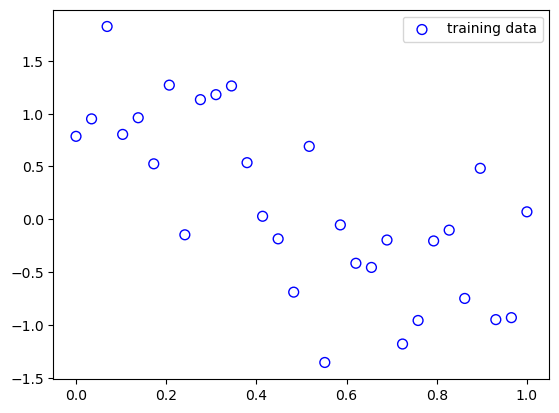

In [60]:
# Consider the given training data points

x_train = np.array([0.0,0.03448276,0.06896552,0.10344828,0.13793103,0.17241379
,0.20689655,0.24137931,0.27586207,0.31034483,0.34482759,0.37931034
,0.4137931,0.44827586,0.48275862,0.51724138,0.55172414,0.5862069
,0.62068966,0.65517241,0.68965517,0.72413793,0.75862069,0.79310345
,0.82758621,0.86206897,0.89655172,0.93103448,0.96551724,1.0])

y_train = np.array([0.78555925,0.95085481,1.82565985,0.80389519,0.96158465,0.52533655
,1.2704089,-0.14653644,1.13308122,1.1800903,1.26261986,0.53629701
,0.02880429,-0.18501542,-0.6894971,0.69057719,-1.35543259,-0.05317237
,-0.41614939,-0.4555357,-0.19606332,-1.18057323,-0.95786116,-0.20486968
,-0.10261094,-0.7491855,0.48288818,-0.94964785,-0.93100609,0.07077979])

x_test = np.array([0.0,0.02040816,0.04081633,0.06122449,0.08163265,0.10204082
,0.12244898,0.14285714,0.16326531,0.18367347,0.20408163,0.2244898
,0.24489796,0.26530612,0.28571429,0.30612245,0.32653061,0.34693878
,0.36734694,0.3877551,0.40816327,0.42857143,0.44897959,0.46938776
,0.48979592,0.51020408,0.53061224,0.55102041,0.57142857,0.59183673
,0.6122449,0.63265306,0.65306122,0.67346939,0.69387755,0.71428571
,0.73469388,0.75510204,0.7755102,0.79591837,0.81632653,0.83673469
,0.85714286,0.87755102,0.89795918,0.91836735,0.93877551,0.95918367
,0.97959184,1.0])

y_test = np.array([8.00000000e-01,7.96303292e-01,7.85247323e-01,7.66934282e-01
,7.41533410e-01,7.09279439e-01,6.70470483e-01,6.25465193e-01
,5.74679470e-01,5.18582714e-01,4.57693336e-01,3.92574028e-01
,3.23826672e-01,2.52086583e-01,1.78016731e-01,1.02301726e-01
,2.56412705e-02,-5.12561929e-02,-1.27679921e-01,-2.02923660e-01
,-2.76292060e-01,-3.47106996e-01,-4.14714049e-01,-4.78488439e-01
,-5.37840717e-01,-5.92222394e-01,-6.41130886e-01,-6.84114214e-01
,-7.20775092e-01,-7.50774732e-01,-7.73835892e-01,-7.89745426e-01
,-7.98356313e-01,-7.99588973e-01,-7.93432012e-01,-7.79942333e-01
,-7.59244595e-01,-7.31530100e-01,-6.97054971e-01,-6.56137798e-01
,-6.09156768e-01,-5.56546051e-01,-4.98791833e-01,-4.36427922e-01
,-3.70030644e-01,-3.00213593e-01,-2.27622070e-01,-1.52926916e-01
,-7.68184085e-02,-1.46957616e-16])

plt.scatter(x_train, y_train, facecolor="none", edgecolor="b", s=50, label="training data")
plt.legend()
plt.show()

## 1a) Experiment with atleast four different values of M (0<=M<=9) and plot graphs for each result

[0.13117601]
[ 1.10955752 -1.95676302]
[ 1.42637903 -3.92558245  1.96881943]
[  1.01756998   1.43976595 -11.67437145   9.09546059]
[  0.8597882    5.16436635 -29.10317339  36.50386368 -13.70420155]
[  0.96799267   0.92425569   2.59125543 -50.03683436  84.4124167
 -39.2466473 ]
[   1.01705357   -2.14454155   36.35777392 -190.27309333  351.63258732
 -275.76909667   78.84081646]
[ 7.83518099e-01  2.08774773e+01 -3.16653807e+02  1.87501132e+03
 -5.46903894e+03  8.20401250e+03 -6.07267217e+03  1.75757514e+03]
[ 6.15268510e-01  6.03089815e+01 -1.32885153e+03  1.18119039e+04
 -5.47532875e+04  1.46615115e+05 -2.35830994e+05  2.25075328e+05
 -1.17461131e+05  2.58109849e+04]


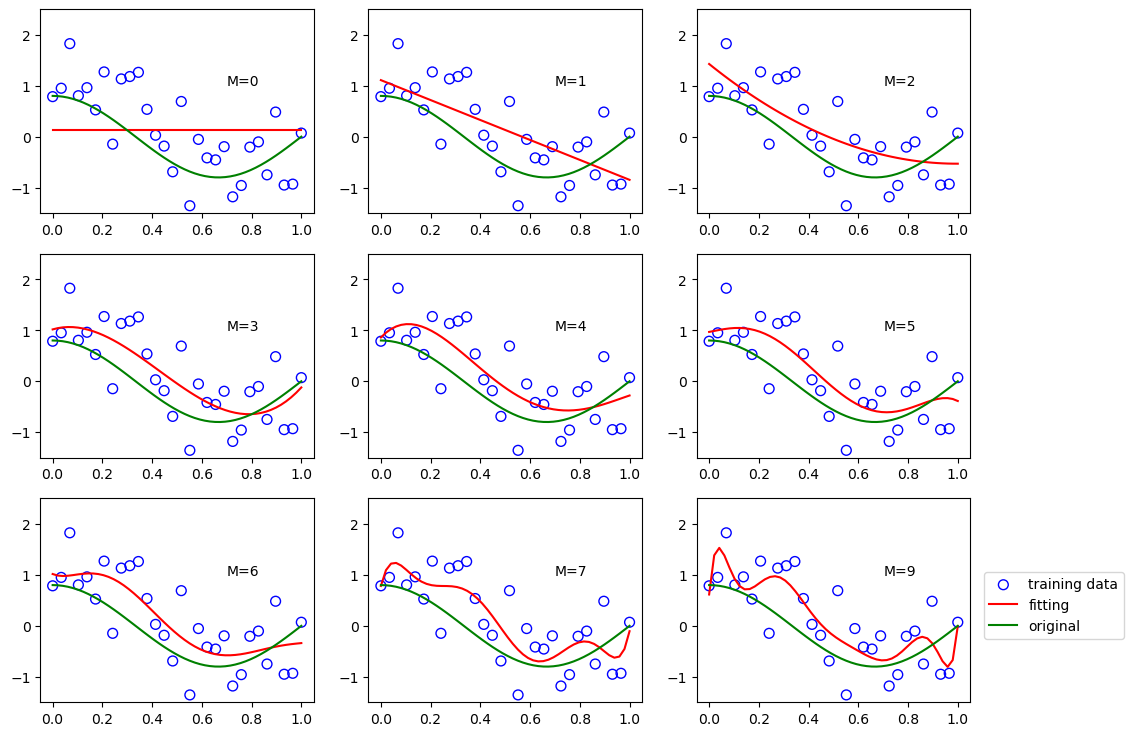

In [63]:
plt.figure(figsize=(12, 9))
#Using model from prml library
for i, degree in enumerate([0,1,2,3,4,5,6,7,9]):
    plt.subplot(3, 3, i + 1)
    
    feature = PolynomialFeature(degree)
    X_train = feature.transform(x_train)
    X_test = feature.transform(x_test)

    model = LinearRegression() 
    model.fit(X_train, y_train)
    print(model.w) #coefficients of linear model
    y = model.predict(X_test)

    plt.scatter(x_train, y_train, facecolor="none", edgecolor="b", s=50, label="training data")
    plt.plot(x_test, y, c="r", label="fitting")
    plt.plot(x_test, y_test, c="g", label="original")
    plt.ylim(-1.5, 2.5)
    plt.annotate("M={}".format(degree), xy=(0.0, 0.9), xytext=(0.7, 1))
plt.legend(bbox_to_anchor=(1.05, 0.64), loc=2, borderaxespad=0.)
plt.show()

## 1b) Which degree of polynomial fits the best and why?

## 2. Polynomial Features

#### Consider x_train, y_train, and x_test from section 1 to predict y. 
#### Use below y_test data to calculate RMSE 

In [64]:
#This section has been copied above as this data has been used above

# Test Data


# y_test = np.array([8.00000000e-01,7.96303292e-01,7.85247323e-01,7.66934282e-01
# ,7.41533410e-01,7.09279439e-01,6.70470483e-01,6.25465193e-01
# ,5.74679470e-01,5.18582714e-01,4.57693336e-01,3.92574028e-01
# ,3.23826672e-01,2.52086583e-01,1.78016731e-01,1.02301726e-01
# ,2.56412705e-02,-5.12561929e-02,-1.27679921e-01,-2.02923660e-01
# ,-2.76292060e-01,-3.47106996e-01,-4.14714049e-01,-4.78488439e-01
# ,-5.37840717e-01,-5.92222394e-01,-6.41130886e-01,-6.84114214e-01
# ,-7.20775092e-01,-7.50774732e-01,-7.73835892e-01,-7.89745426e-01
# ,-7.98356313e-01,-7.99588973e-01,-7.93432012e-01,-7.79942333e-01
# ,-7.59244595e-01,-7.31530100e-01,-6.97054971e-01,-6.56137798e-01
# ,-6.09156768e-01,-5.56546051e-01,-4.98791833e-01,-4.36427922e-01
# ,-3.70030644e-01,-3.00213593e-01,-2.27622070e-01,-1.52926916e-01
# ,-7.68184085e-02,-1.46957616e-16])

### 2a) Plot a graph showing the training RMSE and test RMSE for various values of M (Degree)

[0.6154040785052918, 0.4812483304172772, 0.3947826033780984, 0.3753938007294733, 0.37295104076380015, 0.3739134309252085, 0.37503034450644973, 0.40807850355473824, 0.4088741067476623, 0.43327957361084546]


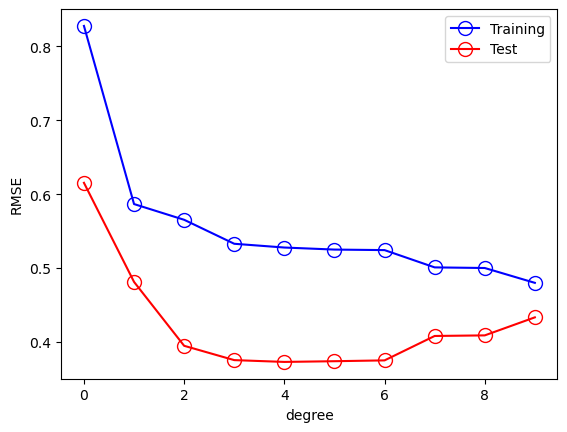

In [66]:
def rmse(a, b):
    return np.sqrt(np.mean(np.square(a - b)))

#your code goes here
training_errors = []
test_errors = []

for i in range(10):
    feature = PolynomialFeature(i)
    X_train = feature.transform(x_train)
    X_test = feature.transform(x_test)

    model = LinearRegression()
    model.fit(X_train, y_train)
    y = model.predict(X_test)
    training_errors.append(rmse(model.predict(X_train), y_train))
    test_errors.append(rmse(y, y_test))
#     test_errors.append(rmse(model.predict(X_test), y_test))

print(test_errors)
plt.plot(training_errors, 'o-', mfc="none", mec="b", ms=10, c="b", label="Training")
plt.plot(test_errors, 'o-', mfc="none", mec="r", ms=10, c="r", label="Test")
plt.legend()
plt.xlabel("degree")
plt.ylabel("RMSE")
plt.show()

### 2b) Explain your observations and which value of M do you think is the best choice for the given data?

### 3. Regularization

# Experiment with atleast 4 different orders of polynomials and for each order use atleast 3 different values of alpha to implement Ridge Regression

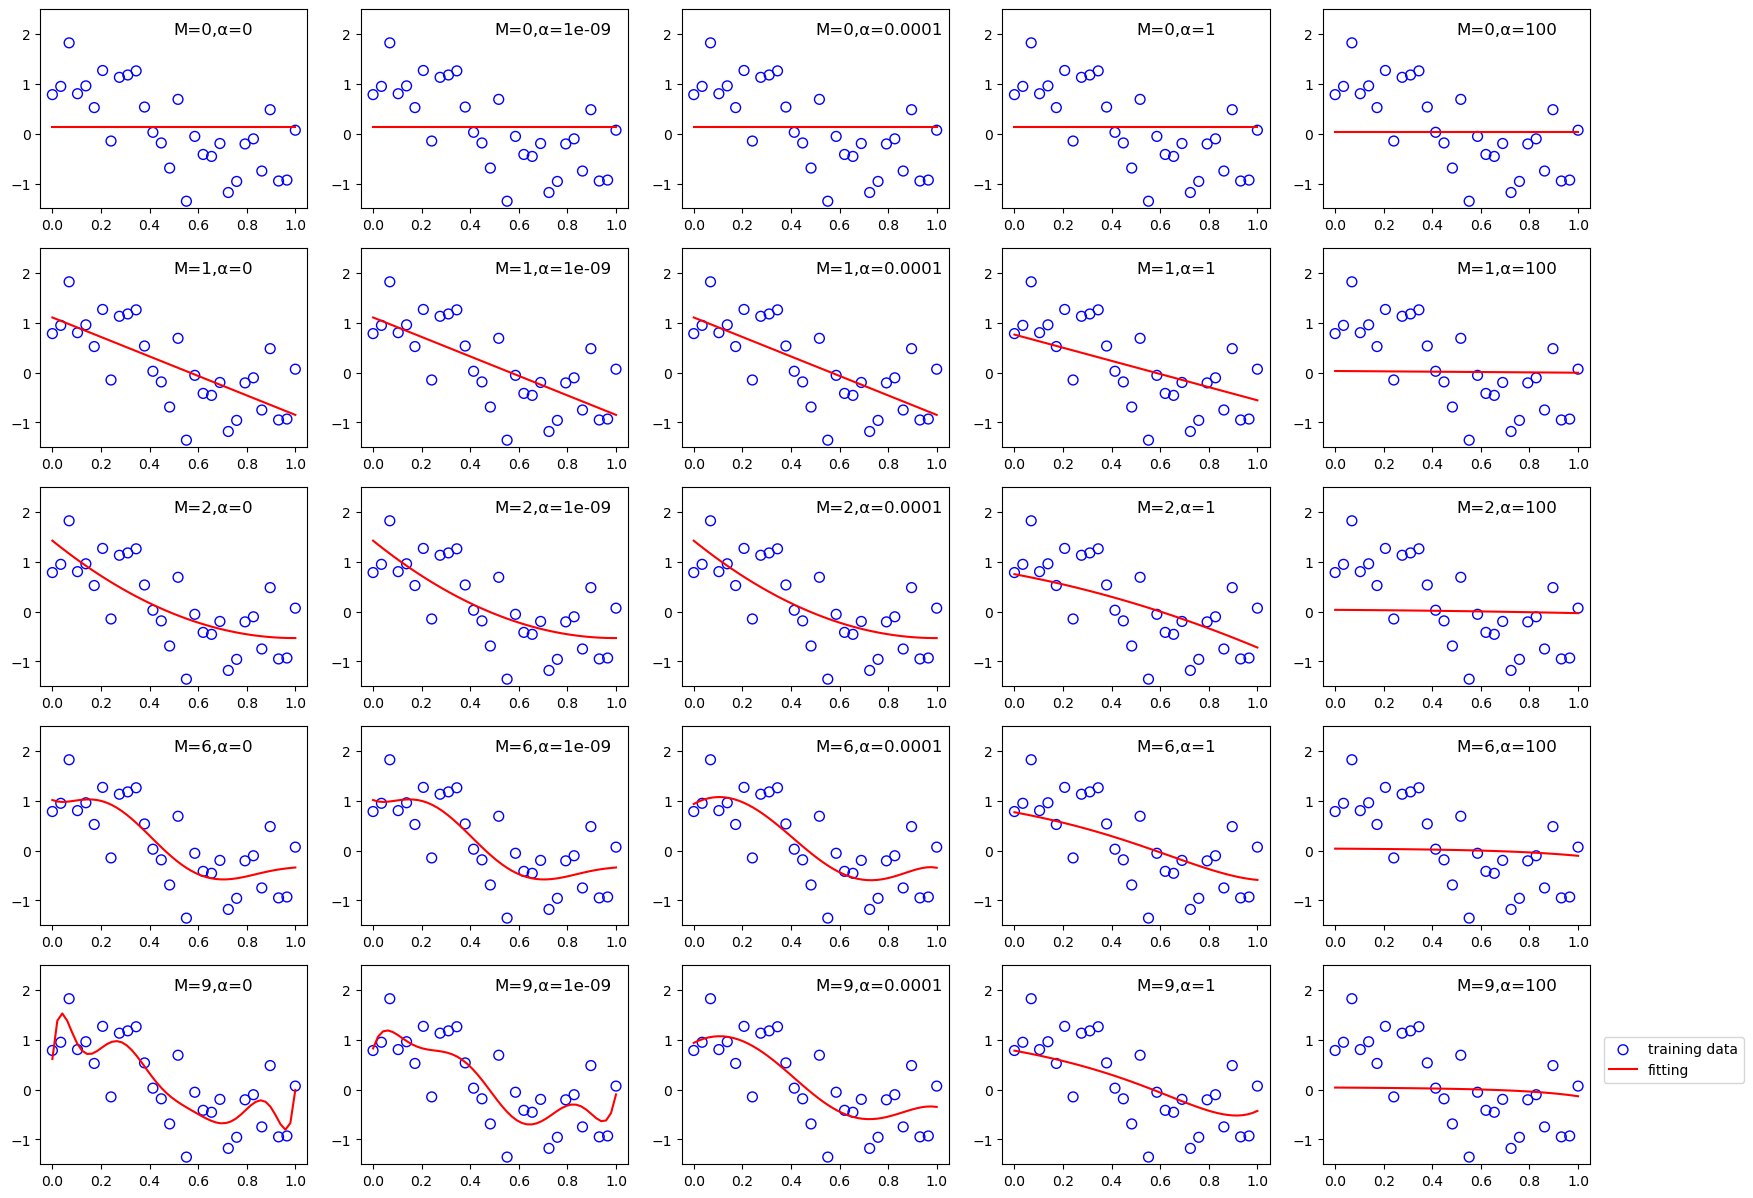

In [67]:
plt.figure(figsize=(20, 15))
for i, degree in enumerate([0,1,2,6,9]):

    feature = PolynomialFeature(degree)
    X_train = feature.transform(x_train)
    X_test = feature.transform(x_test)
    
    alpha_values = [0,1e-9,1e-4,1,100]
    for j in range(len(alpha_values)):
        plt.subplot(5, 5, i*5+ j + 1)
        model = RidgeRegression(alpha_values[j])
        model.fit(X_train, y_train)
        y = model.predict(X_test)

        plt.scatter(x_train, y_train, facecolor="none", edgecolor="b", s=50, label="training data")
        plt.plot(x_test, y, c="r", label="fitting")
        plt.ylim(-1.5, 2.5)
        plt.annotate("M={},α={}".format(degree,alpha_values[j]), xy=(0.0, 0.9), xytext=(0.5, 2), fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 0.64), loc=2, borderaxespad=0.)
plt.show()

# Observations:

## The dataset generating functions are below

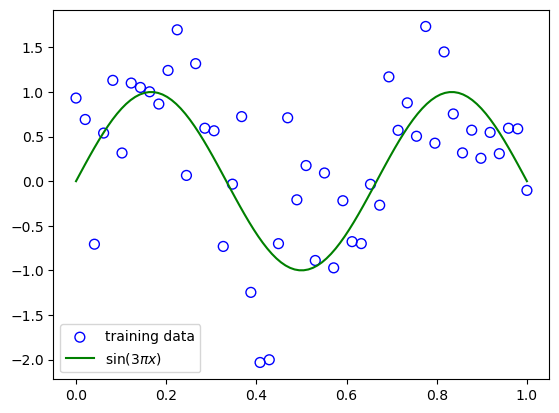

In [68]:
def create_toy_data(func, sample_size, std):
    x = np.linspace(0, 1, sample_size)#Return evenly spaced numbers over a specified interval [0, 1].
    t = func(x) + np.random.normal(scale=std, size=x.shape) #Draw random samples from a normal (Gaussian) distribution.
    return x, t

def func(x):
    return np.sin(3 * np.pi * x)
#an example dataset using std=0.7 is as follows
x_train, y_train = create_toy_data(func, 50, 0.7)
x_test = np.linspace(0, 1, 100)
y_test = func(x_test)

plt.scatter(x_train, y_train, facecolor="none", edgecolor="b", s=50, label="training data")
plt.plot(x_test, y_test, c="g", label="$\sin(3\pi x) $")
plt.legend()
plt.show()

## Create atleast 2 datasets using different types of values (e.g., small or large) for std in the create_toy_data() and choosing a different func(), which was considered as a sinosoid for my example


# Repeat section 1a,1b,2a,2b, and 3 for the two new datasets generated

# New Dataset 1

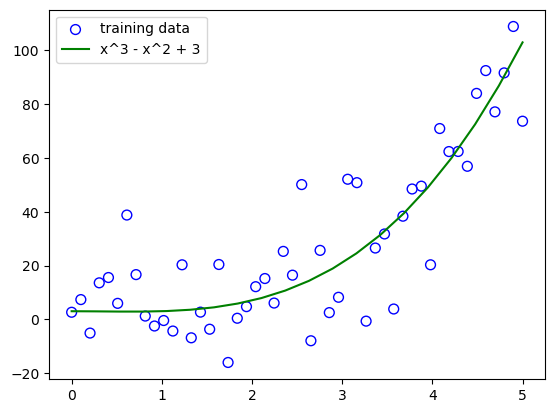

In [69]:
def create_toy_data_1(func1, sample_size, std):
    x = np.linspace(0, 5, sample_size)#Return evenly spaced 50 numbers over a specified interval [0, 5].
    t = func1(x) + np.random.normal(scale=std, size=x.shape) #Draw random samples from a normal (Gaussian) distribution.
    return x, t

def func1(x):
    return x**3 - x**2 + 3
#an example dataset using std=15.0 is as follows
x_train1, y_train1 = create_toy_data_1(func1, 50, 15.0)
x_test1 = np.linspace(0, 5, 20) #test data set of size 20
y_test1 = func1(x_test1)

plt.scatter(x_train1, y_train1, facecolor="none", edgecolor="b", s=50, label="training data")
plt.plot(x_test1, y_test1, c="g", label="x^3 - x^2 + 3")
plt.legend()
plt.show()

# Experiment with atleast four different values of M (0<=M<=9) and plot graphs for each result

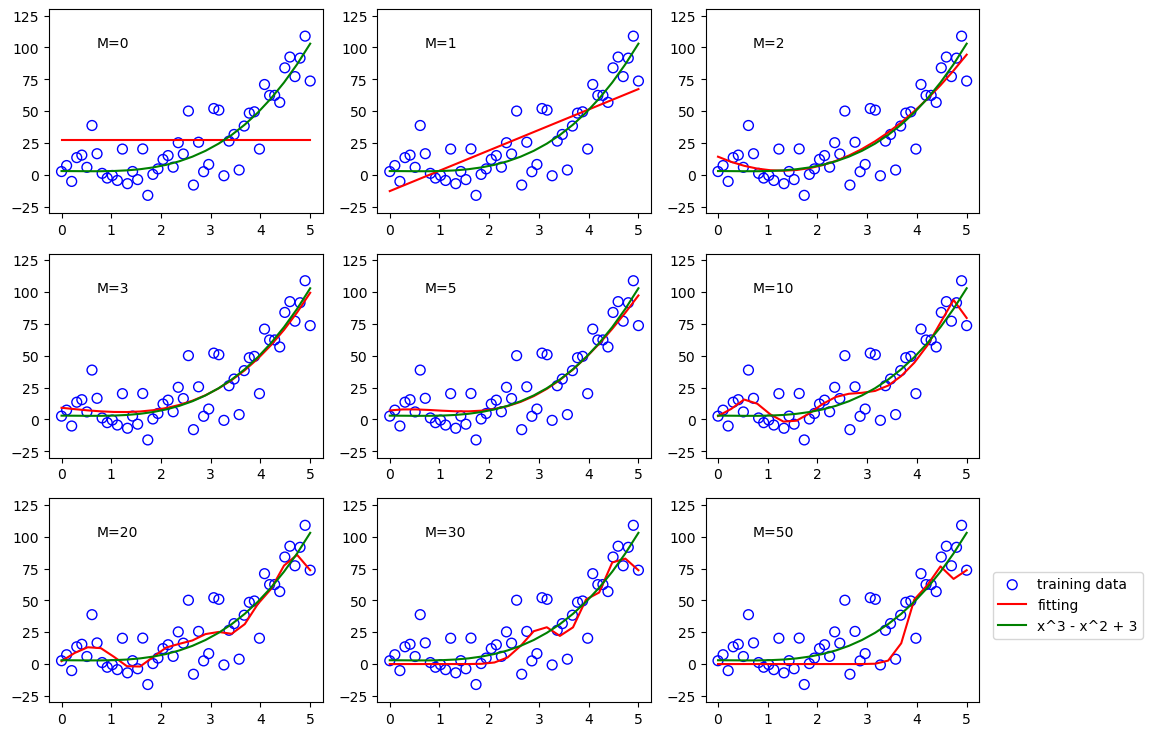

In [70]:
#Using model from prml library

plt.figure(figsize=(12, 9))
for i, degree in enumerate([0,1,2,3,5,10,20,30,50]):
    plt.subplot(3, 3, i + 1)
    
    feature = PolynomialFeature(degree)
    X_train1 = feature.transform(x_train1)
    X_test1 = feature.transform(x_test1)

    model = LinearRegression() 
    model.fit(X_train1, y_train1)
    y1 = model.predict(X_test1)

    plt.scatter(x_train1, y_train1, facecolor="none", edgecolor="b", s=50, label="training data")
    plt.plot(x_test1, y1, c="r", label="fitting")
    plt.plot(x_test1, y_test1, c="g", label="x^3 - x^2 + 3")
    plt.ylim(-30, 130)
    plt.annotate("M={}".format(degree), xy=(0.0, 0.9), xytext=(0.7, 100))
plt.legend(bbox_to_anchor=(1.05, 0.64), loc=2, borderaxespad=0.)
plt.show()

# Plot a graph showing the training RMSE and test RMSE for various values of M (Degree)

[30.35463891911876, 13.898952514335416, 4.014360294707738, 2.701854339608855, 2.8278499387756173, 2.8292765309051804, 6.672646632159724, 7.012159659837752, 6.846164209259803, 7.434589514008869, 7.511715422178923, 8.005358633358547, 8.14846382370373, 8.173547310628928, 8.518553927199457]


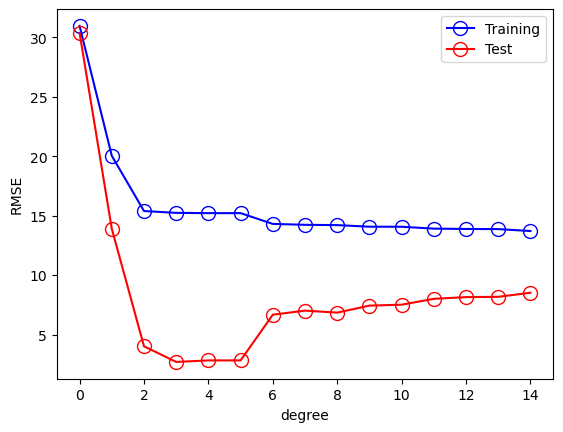

In [71]:
#your code goes here
training_errors = []
test_errors = []

for i in range(15):
    feature = PolynomialFeature(i)
    X_train1 = feature.transform(x_train1)
    X_test1 = feature.transform(x_test1)

    model = LinearRegression()
    model.fit(X_train1, y_train1)
    y1 = model.predict(X_test1)
    training_errors.append(rmse(model.predict(X_train1), y_train1))
    test_errors.append(rmse(y1, y_test1))

print(test_errors)
plt.plot(training_errors, 'o-', mfc="none", mec="b", ms=10, c="b", label="Training")
plt.plot(test_errors, 'o-', mfc="none", mec="r", ms=10, c="r", label="Test")
plt.legend()
plt.xlabel("degree")
plt.ylabel("RMSE")
plt.show()

# Explain your observations and which value of M do you think is the best choice for the given data?

# Regularization

# Experiment with atleast 4 different orders of polynomials and for each order use atleast 3 different values of alpha to implement Ridge Regression

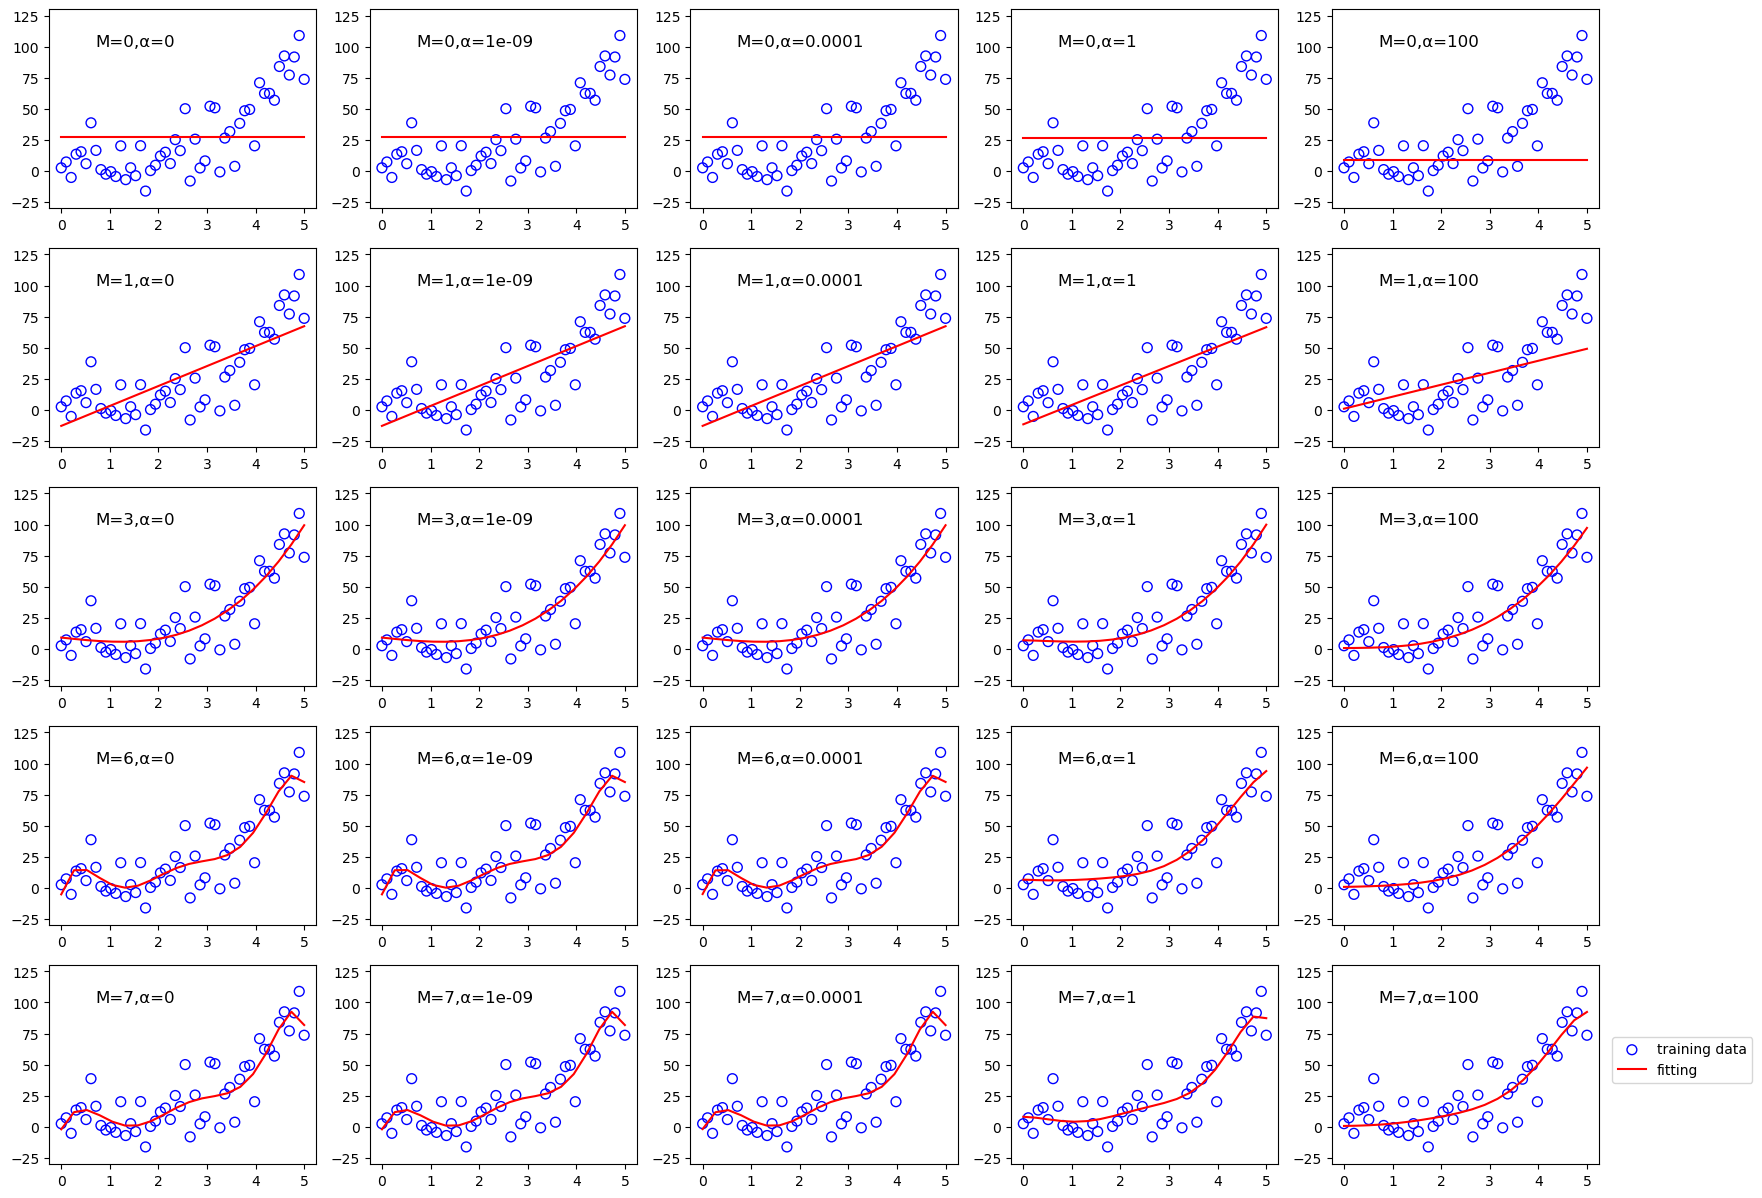

In [75]:
plt.figure(figsize=(20, 15))
alpha_values = [0,1e-9,1e-4,1,100]

for i, degree in enumerate([0,1,3,6,7]):
    feature = PolynomialFeature(degree)
    X_train1 = feature.transform(x_train1)
    X_test1 = feature.transform(x_test1)
    
    for j in range(len(alpha_values)):
        plt.subplot(5, 5, i*5+ j + 1)
        plt.figsize=(100,100)
        model = RidgeRegression(alpha_values[j])
        model.fit(X_train1, y_train1)
        y1 = model.predict(X_test1)

        plt.scatter(x_train1, y_train1, facecolor="none", edgecolor="b", s=50, label="training data")
        plt.plot(x_test1, y1, c="r", label="fitting")
        plt.ylim(-30, 130)
        plt.annotate("M={},α={}".format(degree,alpha_values[j]), xy=(0.0, 0.9), xytext=(0.7, 100), fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 0.64), loc=2, borderaxespad=0.)
plt.show()

# New Dataset 2

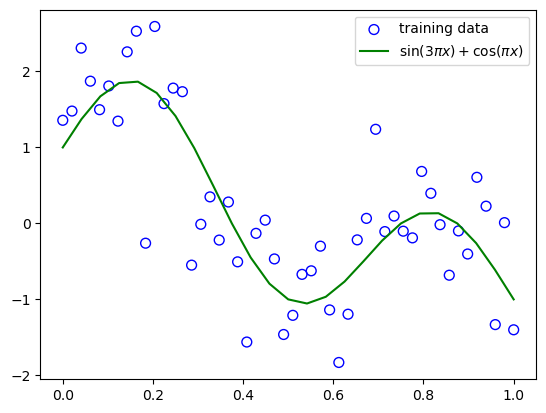

In [80]:
def create_toy_data_2(func2, sample_size, std):
    x = np.linspace(0, 1, sample_size)#Return evenly spaced 50 numbers over a specified interval [0, 1].
    t = func2(x) + np.random.normal(scale=std, size=x.shape) #Draw random samples from a normal (Gaussian) distribution.
    return x, t

def func2(x):
    return (np.sin( 3* np.pi * x) + np.cos(np.pi * x))
#an example dataset using std=0.7 is as follows
x_train2, y_train2 = create_toy_data_2(func2, 50, 0.7)
x_test2 = np.linspace(0, 1, 25) #test data set of size 25
y_test2 = func2(x_test2)

plt.scatter(x_train2, y_train2, facecolor="none", edgecolor="b", s=50, label="training data")
plt.plot(x_test2, y_test2, c="g", label="$\sin(3\pi x) + \cos(\pi x) $")
plt.legend()
plt.show()

# Experiment with atleast four different values of M (0<=M<=9) and plot graphs for each result

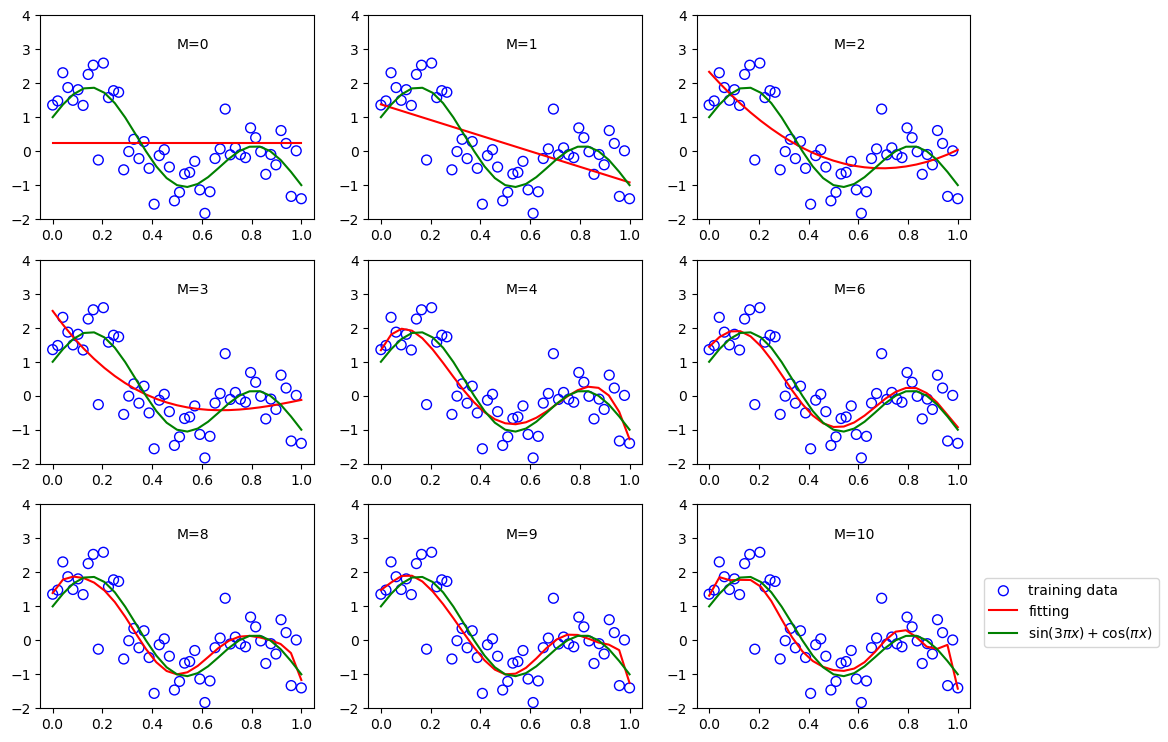

In [81]:
#Using model from prml library

plt.figure(figsize=(12, 9))
for i, degree in enumerate([0,1,2,3,4,6,8,9,10]):
    plt.subplot(3, 3, i + 1)
    
    feature = PolynomialFeature(degree)
    X_train2 = feature.transform(x_train2)
    X_test2 = feature.transform(x_test2)

    model = LinearRegression() 
    model.fit(X_train2, y_train2)
    y2 = model.predict(X_test2)

    plt.scatter(x_train2, y_train2, facecolor="none", edgecolor="b", s=50, label="training data")
    plt.plot(x_test2, y2, c="r", label="fitting")
    plt.plot(x_test2, y_test2, c="g", label="$\sin(3\pi x) + \cos(\pi x) $")
    plt.ylim(-2, 4)
    plt.annotate("M={}".format(degree), xy=(0.0, 0.9), xytext=(0.5, 3))
plt.legend(bbox_to_anchor=(1.05, 0.64), loc=2, borderaxespad=0.)
plt.show()

# Plot a graph showing the training RMSE and test RMSE for various values of M (Degree)¶

[0.9799747963557184, 0.670690339353991, 0.593083614803849, 0.6086409046651743, 0.2433218520279973, 0.24548526354965147, 0.20929101976905895, 0.2177902108952829, 0.2187235009175378, 0.23037891003471106, 0.24973625037946762, 0.25667494977896094, 0.27464451382630695, 0.2915157732398906, 0.28968265919201813]


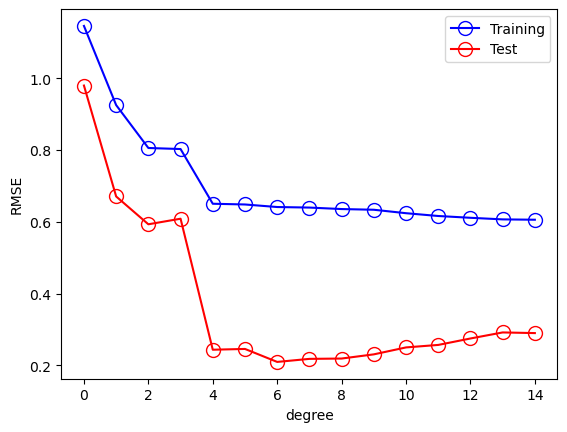

In [82]:
#your code goes here
training_errors = []
test_errors = []

for i in range(15):
    feature = PolynomialFeature(i)
    X_train2 = feature.transform(x_train2)
    X_test2 = feature.transform(x_test2)

    model = LinearRegression()
    model.fit(X_train2, y_train2)
    y2 = model.predict(X_test2)
    training_errors.append(rmse(model.predict(X_train2), y_train2))
    test_errors.append(rmse(y2, y_test2))

print(test_errors)
plt.plot(training_errors, 'o-', mfc="none", mec="b", ms=10, c="b", label="Training")
plt.plot(test_errors, 'o-', mfc="none", mec="r", ms=10, c="r", label="Test")
plt.legend()
plt.xlabel("degree")
plt.ylabel("RMSE")
plt.show()

# Explain your observations and which value of M do you think is the best choice for the given data?

# Regularization

# Experiment with atleast 4 different orders of polynomials and for each order use atleast 3 different values of alpha to implement Ridge Regression

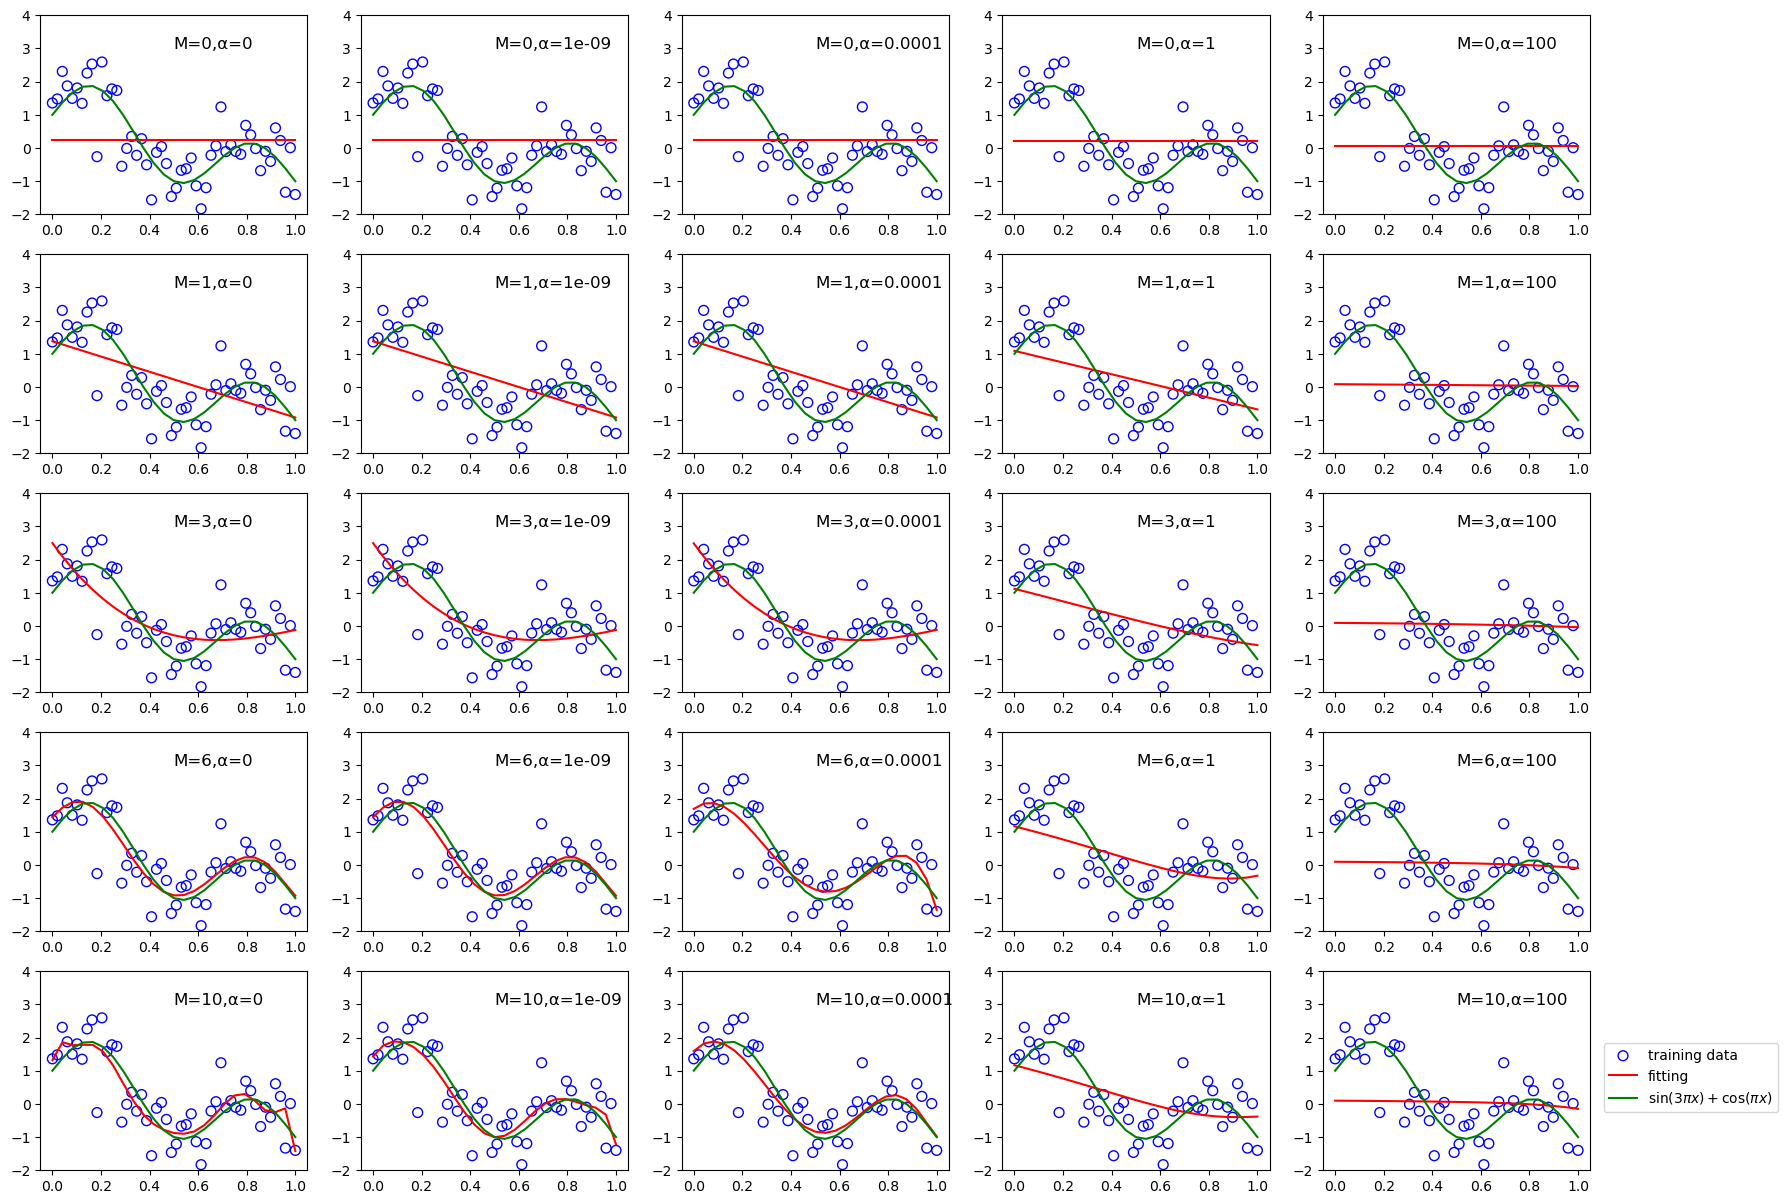

In [83]:
plt.figure(figsize=(20, 15))
alpha_values = [0,1e-9,1e-4,1,100]

for i, degree in enumerate([0,1,3,6,10]):
    feature = PolynomialFeature(degree)
    X_train2 = feature.transform(x_train2)
    X_test2 = feature.transform(x_test2)
    
    for j in range(len(alpha_values)):
        plt.subplot(5, 5, i*5+ j + 1)
        plt.figsize=(100,100)
        model = RidgeRegression(alpha_values[j])
        model.fit(X_train2, y_train2)
        y2 = model.predict(X_test2)

        plt.scatter(x_train2, y_train2, facecolor="none", edgecolor="b", s=50, label="training data")
        plt.plot(x_test2, y2, c="r", label="fitting")
        plt.plot(x_test2, y_test2, c="g", label="$\sin(3\pi x) + \cos(\pi x) $")
        plt.ylim(-2, 4)
        plt.annotate("M={},α={}".format(degree,alpha_values[j]), xy=(0.0, 0.9), xytext=(0.5, 3), fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 0.64), loc=2, borderaxespad=0.)
plt.show()